## 1. Logistic Regression

### 1.1 Load and Plot Data

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

In [2]:
# Print the head of the data
data = np.loadtxt('data/ex2data1.txt', delimiter = ',')
print('Dimensions: ', data.shape)
print(data[:5])

Dimensions:  (100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


In [3]:
# Preparing Training Data
X = np.column_stack((np.ones(data.shape[0]),data[:,:2]))
y = np.reshape(data[:,-1],(-1,1))
print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


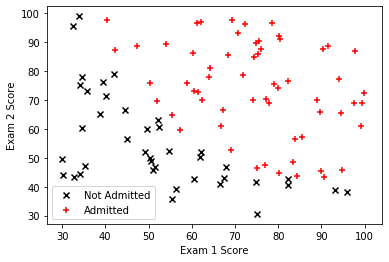

In [4]:
# Plot Data
neg = data[:,2] == 0
pos = data[:,2] == 1
plt.scatter(data[neg][:,0],data[neg][:,1],marker = 'x', c = 'k', label = 'Not Admitted')
plt.scatter(data[pos][:,0],data[pos][:,1],marker = '+', c = 'r', label = 'Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend();

### 1.2 Implementation

#### 1.2.1 Sigmoid Function

The logistic regression hypothesis is defined as:
$$ h_\theta(x) = g(X\theta)$$
<br>
Where function $g$ is the sigmoid function. The sigmoid function is defined as:
$$g(z) = \frac{1}{1 + e ^{-z}}$$

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#### 1.2.2 Cost Function

$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))]$$
<br>
**Vectorized Cost Function**
$$J(\theta) = -\frac{1}{m}((log(g(X\theta))^Ty + (log(1 - g(X\theta))^T(1 - y))$$

In [6]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1 / m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

#### 1.2.3 Partial Derivative

$$\frac{\delta J(\theta)}{\delta\theta_j} = \frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j$$
<br>
**Vectorized**
$$\frac{\delta J(\theta)}{\delta \theta_j} = \frac{1}{m}X^T(g(X\theta) -y)$$

In [7]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    grad = (1/m) * X.T.dot(h - y)
    return(grad.flatten())

In [8]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('theta: \n', initial_theta.flatten())
print('Cost: \n', cost)
print('Grad: \n', grad)

theta: 
 [0. 0. 0.]
Cost: 
 0.6931471805599452
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


### 1.3 Optimize cost function

Using scipy.optimize library minimize function.<br>
<br>
For logistic regression, we want to optimize the cost funtion $J(\theta)$ with parameters $\theta$. Pass to *optimize.minimize* the following inputs:

    - costFunction: with no parenthesis.(only providing a reference to this function)
    - initial_theta
    - (X, y): additional arguments to the cost function
    - jac: indication if the cost function returns the Jacobian(gradient) along with cost value
    - method: Optimize method/algorithm to use
    - options 

In [9]:
options = {'maxiter':400}
res = scipy.optimize.minimize(costFunction, initial_theta, args = (X,y), jac = gradient, method = None, options = options)
print('cost: ',res.fun)
print('theta: ', res.x)

cost:  0.2034977015895099
theta:  [-25.16131634   0.2062316    0.20147143]


/Users/wenna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/wenna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


### 1.4 Predict

In [10]:
def predict(theta, X, threshold = 0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [11]:
# For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
# you should expect to see an admission probability of 0.776.
probability = sigmoid(np.array([1,45,85]).dot(res.x.T))
print(probability)

0.7762903249331023


In [12]:
# Calculate the training set accuracy
p = predict(res.x, X)
accuracy = sum(p == y.ravel())/p.size * 100
print('Train Accuracy:{}%'.format(accuracy))

Train Accuracy:89.0%


### 1.5 Plot Decision Boundary

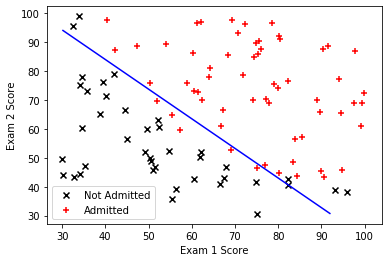

In [13]:
plt.scatter(data[neg][:,0],data[neg][:,1], marker = 'x', c = 'k', label = 'Not Admitted')
plt.scatter(data[pos][:,0],data[pos][:,1], marker = '+', c = 'r', label = 'Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
x_new = np.column_stack((np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()))
h = sigmoid(x_new.dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], colors = 'b');

## 2. Regularized Logistic Regression

### 2.1 Load and Plot Data

In [14]:
data2 = np.loadtxt('data/ex2data2.txt',delimiter = ',')
print('Dimensions: ', data2.shape)
print(data2[:5])

Dimensions:  (118, 3)
[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


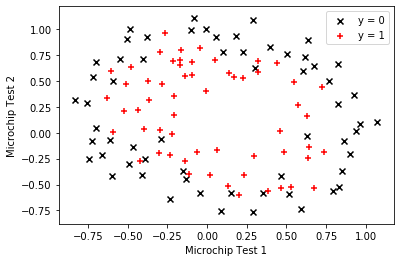

In [15]:
neg = data2[:,2] == 0
pos = data2[:,2] == 1
plt.scatter(data2[neg][:,0],data2[neg][:,1],marker = 'x', c = 'k', label = 'y = 0')
plt.scatter(data2[pos][:,0],data2[pos][:,1],marker = '+', c = 'r', label = 'y = 1')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend();

### 2.2 Implementation

#### 2.2.1 Feature Mapping

Map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$mapFeature(x) = \begin{bmatrix}1&x_1&x_2&x_1^2&x_1x_2&x_2^2&x_1^3&...&x_1x_2^5&x_2^6\end{bmatrix}$$
<br>
As a result of this mapping, the vector of two features has been transformed into a 28-dimensional vector.

In [16]:
# import library
import sklearn.preprocessing
poly = sklearn.preprocessing.PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
y = data2[:,2]
print(XX.shape)

(118, 28)


#### 2.2.2 Regularized Cost Function

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(h_\theta(x^{(i)})) 
+ (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))] 
+ \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$$
<br>
$$h_\theta(x) = g(X\theta)$$
<br>
$$g(z) = \frac{1}{1 + e^{-z}}$$
**Vectorized Cost Function**
$$J(\theta) = 
-\frac{1}{m}[log(g(X\theta))^T\cdot y + log(1 - g(X\theta))^T \cdot (1 - y)]
+ \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$$

In [17]:
def costFunctionReg(theta, lam, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1 / m * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) + lam/(2*m)*np.sum(np.square(theta[1:]))
    return J

#### 2.2.3 Regularized Partial Derivative

$$\frac{\delta J(\theta)}{\delta\theta_j}
= \frac{1}{m}\sum_{i = 1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} 
+ \frac{\lambda}{m}\theta_j$$
<br>

**Vectorized Partial Derivative**

$$\frac{\delta J(\theta)}{\delta\theta_j}
= \frac{1}{m}X^T(g(X\theta) - y) + \frac{\lambda}{m}\theta_j$$


**Note that:** intercept parameter $\theta_0$ is not to be regularized

In [18]:
def gradientReg(theta, lam, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    theta[0] = 0
    grad = (1/m) * X.T.dot(h - y) + (lam/m) * theta
    return(grad.flatten())

In [19]:
initial_thetareg = np.zeros((XX.shape[1],1))
cost_reg = costFunctionReg(initial_thetareg, 1, XX, y)
print('Cost with initial theta: ', cost_reg)
grad_reg = gradientReg(initial_thetareg, 1, XX, y)
print('Gradient with initial theta: ', grad_reg[:5])

Cost with initial theta:  [0.69314718]
Gradient with initial theta:  [-0.5 -0.5 -0.5 -0.5 -0.5]


### 2.2.4 Plot with Optimizing costFunction

/Users/wenna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


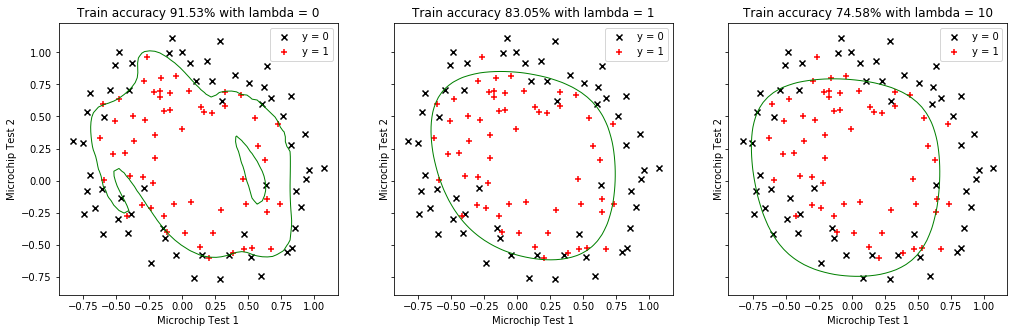

In [27]:
fig, axes = plt.subplots(1,3, sharey = True, figsize = (17,5))

# Iterate through the lambda value
for i, L in enumerate([0,1,10]):
    res2 = scipy.optimize.minimize(costFunctionReg, initial_thetareg, args = (L, XX, y), method = None,jac = gradientReg, options = {'maxiter': 3000})
    
    # Calculate Accuracy
    accuracy = 100 * sum(predict(res2.x, XX) == y.ravel())/y.size
    
    # Scatter plot of X, y
    axes[i].scatter(data2[neg][:,0],data2[neg][:,1],marker = 'x', c = 'k', label = 'y = 0')
    axes[i].scatter(data2[pos][:,0],data2[pos][:,1],marker = '+', c = 'r', label = 'y = 1')
    axes[i].set_xlabel('Microchip Test 1')
    axes[i].set_ylabel('Microchip Test 2')
    axes[i].legend()

    # Plot Decisionboundary
    x1_min, x1_max = data2[:,0].min(), data2[:,0].max()
    x2_min, x2_max = data2[:,1].min(), data2[:,1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.column_stack((xx1.ravel(), xx2.ravel()))).dot(res2.x.reshape(-1,1)))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors = 'g')
    axes.flatten()[i].set_title('Train accuracy {}% with lambda = {}'.format(np.round(accuracy, decimals = 2),L));

From the figure above, we can get the conclusion that:
1. Lambda = 0: 
    - No regularization.
    - Too flexible, overfitting the training data
2. Lambda = 1:
    - Seems alright
3. Lambda = 10:
    - Too much regularization
    - High bias